### Super Store Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/Hmz/Downloads/Compressed/archive_23/Stores.csv")

In [3]:
data

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [4]:
data = data.rename(columns={'Store ID ':'Store_id'})

In [5]:
data.columns

Index(['Store_id', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_id              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [7]:
data.corr()

,Store_id,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_id,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [8]:
data.describe()

,Store_id,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


### Considering the following:


1. MIssing values
2. Explore about the numerical variables
3. Explore about categorical variables
4. Finding relationship between features

In [9]:
data.shape

(896, 5)

In [10]:
data.isnull().sum()

Store_id                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [11]:
data.dtypes

Store_id                int64
Store_Area              int64
Items_Available         int64
Daily_Customer_Count    int64
Store_Sales             int64
dtype: object

In [12]:
store_item = data.groupby(['Items_Available','Store_Area', 'Store_id']).size().reset_index().rename(columns={0:'Store_count'})

In [13]:
store_item

,Items_Available,Store_Area,Store_id,Store_count
0,932,775,159,1
1,951,780,866,1
2,1018,854,745,1
3,1050,869,550,1
4,1059,896,407,1
...,...,...,...,...
891,2492,2067,850,1
892,2493,2063,399,1
893,2617,2169,92,1
894,2647,2214,541,1


### Observation 

1.  The store having Store_ID 159 in Store_Area 775 has 932 number of items which is the lowest number of items in a particular store.

2. The store having Store_ID 467 in Store_Area 2229 has 2667 number of items which is the highest number of items in a particular store.

In [14]:
store_daily_cust_count =  data.groupby(['Daily_Customer_Count', 'Store_id', 'Store_Area']).size().reset_index().rename(columns={0:'Store_count'})

In [15]:
store_daily_cust_count

,Daily_Customer_Count,Store_id,Store_Area,Store_count
0,10,40,1270,1
1,70,152,1662,1
2,100,877,1259,1
3,120,231,1347,1
4,130,147,1442,1
...,...,...,...,...
891,1450,313,1494,1
892,1470,95,1921,1
893,1490,536,1057,1
894,1530,350,1886,1


### Observation
 

1. The store having Store_ID 849 in Store_Area 919 has 1560 of customers in a month i.e they have the maximum number of customer visits per month.

2. The store having Store_ID 40 in Store_Area 1270 has 10 customers in a month i.e they have the minimum number of customer visits per month.


In [16]:
store_sales =  data.groupby(['Store_Sales','Store_Area', 'Store_id']).size().reset_index().rename(columns={0:'Store_count'})

In [17]:
store_sales

,Store_Sales,Store_Area,Store_id,Store_count
0,14920,1250,32,1
1,16370,1477,853,1
2,17670,1537,776,1
3,20270,1624,594,1
4,21300,1397,353,1
...,...,...,...,...
891,101820,1486,759,1
892,102310,1303,409,1
893,102920,1365,433,1
894,105150,1775,869,1


### Observation 

1. The store having Store_ID 32 in Store_Area 1250 has $14920 store sales which is the lowest sales made by a store.

2. The store having Store_ID 650 in Store_Area 1989 has $116320 which is the highest sales made by a store.



In [18]:
sales_cust =  data.groupby(['Store_Sales','Daily_Customer_Count', 'Items_Available', 'Store_id', 'Store_Area']).size().reset_index().rename(columns={0:'Store_count'})

In [19]:
sales_cust

,Store_Sales,Daily_Customer_Count,Items_Available,Store_id,Store_Area,Store_count
0,14920,990,1508,32,1250,1
1,16370,880,1790,853,1477,1
2,17670,660,1877,776,1537,1
3,20270,870,1946,594,1624,1
4,21300,850,1686,353,1397,1
...,...,...,...,...,...,...
891,101820,820,1758,759,1486,1
892,102310,1310,1587,409,1303,1
893,102920,680,1638,433,1365,1
894,105150,980,2104,869,1775,1


### Observation 

1. The Store having Store_id 32 and Store_Area 1250 that has the least store_sales of 14920 also has daily_customer visit of 990 and there are 1508 items available in that store 

2. The Store having Store_id 650 and Store_Area 1989 that has the Highest store_sales of 116320 also has daily_customer visit of 860 and there are 2414 items available in that store 


In [20]:
cust_sales =  data.groupby(['Daily_Customer_Count','Store_Sales', 'Items_Available', 'Store_id', 'Store_Area']).size().reset_index().rename(columns={0:'Store_count'})

In [21]:
cust_sales

,Daily_Customer_Count,Store_Sales,Items_Available,Store_id,Store_Area,Store_count
0,10,45480,1516,40,1270,1
1,70,63730,1986,152,1662,1
2,100,88270,1493,877,1259,1
3,120,72350,1628,231,1347,1
4,130,58920,1750,147,1442,1
...,...,...,...,...,...,...
891,1450,43640,1806,313,1494,1
892,1470,77120,2305,95,1921,1
893,1490,35420,1262,536,1057,1
894,1530,40350,2228,350,1886,1


### Observation  

1. The Store having Store_id 40 and Store_Area 1270 that has the least Daily_Customer_Count of 10 also has store_sales of $45480 and there are 1099 items available in that store.

2. The Store having Store_id 849 and Store_Area 919 that has the Highest Daily_Customer_Count of 1560 also has Store_Sales  of $73810 and there are 1099 items available in that store. 


In [22]:
Item_store =  data.groupby(['Items_Available','Store_Sales', 'Daily_Customer_Count', 'Store_id', 'Store_Area']).size().reset_index().rename(columns={0:'Store_count'})

In [23]:
Item_store

,Items_Available,Store_Sales,Daily_Customer_Count,Store_id,Store_Area,Store_count
0,932,42530,1090,159,775,1
1,951,25600,790,866,780,1
2,1018,77740,660,745,854,1
3,1050,52540,850,550,869,1
4,1059,75110,870,407,896,1
...,...,...,...,...,...,...
891,2492,70230,790,850,2067,1
892,2493,51480,810,399,2063,1
893,2617,67080,600,92,2169,1
894,2647,65900,740,541,2214,1


### Observation 

1. The Store having Store_id 159 and Store_Area 775 that has the least Items_Available of 932 also has store_sales of $42530 and Daily_Customer_Count of 1090.

2.The Store having Store_id 467 and Store_Area 2229 that has the Maximum Items_Available of 2667 also has store_sales of $87410 and Daily_Customer_Count of 660.


In [24]:
item = Item_store.tail(10)
item

,Items_Available,Store_Sales,Daily_Customer_Count,Store_id,Store_Area,Store_count
886,2414,116320,860,650,1989,1
887,2420,85670,850,799,2019,1
888,2436,77960,680,470,2015,1
889,2465,63510,720,551,2049,1
890,2474,80340,340,164,2044,1
891,2492,70230,790,850,2067,1
892,2493,51480,810,399,2063,1
893,2617,67080,600,92,2169,1
894,2647,65900,740,541,2214,1
895,2667,87410,660,467,2229,1


<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

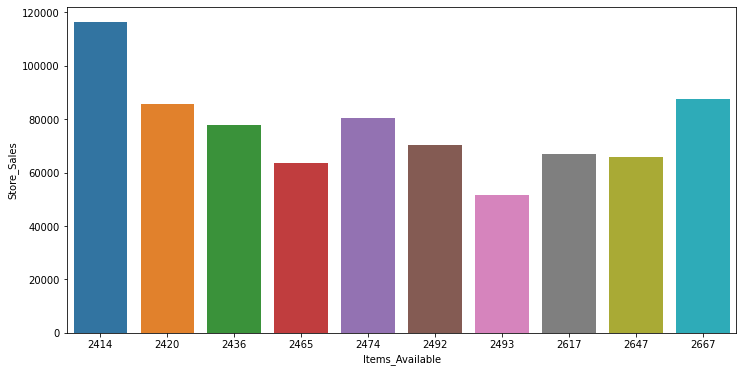

In [25]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Items_Available",y="Store_Sales",data=item)

In [26]:
item_least = Item_store.head(10)
item_least

,Items_Available,Store_Sales,Daily_Customer_Count,Store_id,Store_Area,Store_count
0,932,42530,1090,159,775,1
1,951,25600,790,866,780,1
2,1018,77740,660,745,854,1
3,1050,52540,850,550,869,1
4,1059,75110,870,407,896,1
5,1073,67370,630,73,891,1
6,1087,56820,680,498,902,1
7,1093,64640,1210,292,902,1
8,1099,73810,1560,849,919,1
9,1106,56610,860,262,913,1


<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

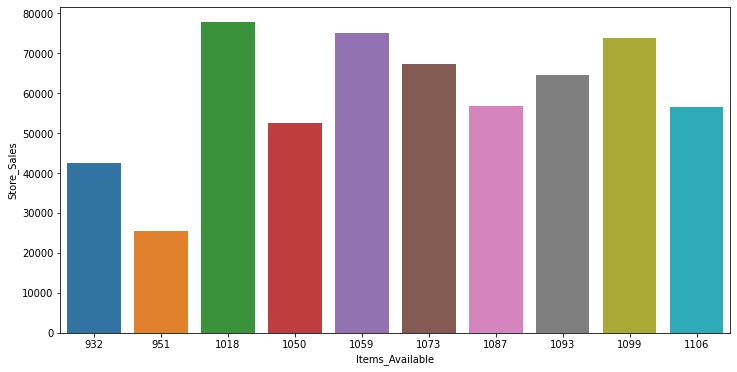

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Items_Available",y="Store_Sales",data=item_least)

<AxesSubplot:xlabel='Items_Available', ylabel='Daily_Customer_Count'>

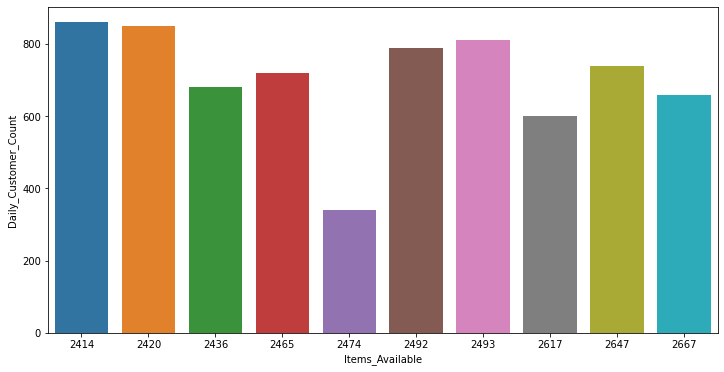

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Items_Available", y="Daily_Customer_Count",data=item)

<AxesSubplot:xlabel='Items_Available', ylabel='Daily_Customer_Count'>

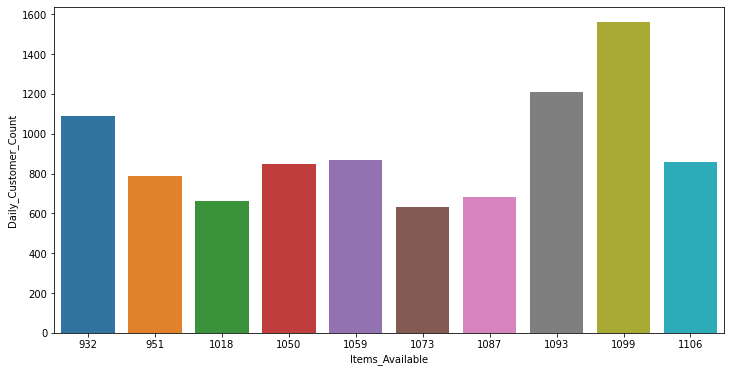

In [29]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Items_Available", y="Daily_Customer_Count",data=item_least)

In [30]:
sales = sales_cust.tail(10)
sales

,Store_Sales,Daily_Customer_Count,Items_Available,Store_id,Store_Area,Store_count
886,98260,1100,2158,872,1800,1
887,99480,480,1858,693,1548,1
888,99570,680,1763,167,1465,1
889,100900,900,1854,867,1565,1
890,101780,700,1374,558,1137,1
891,101820,820,1758,759,1486,1
892,102310,1310,1587,409,1303,1
893,102920,680,1638,433,1365,1
894,105150,980,2104,869,1775,1
895,116320,860,2414,650,1989,1


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

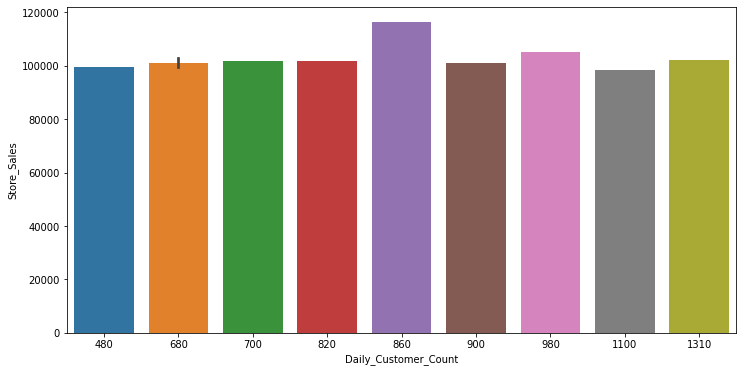

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Daily_Customer_Count", y="Store_Sales",data=sales)

In [32]:
sales_head = sales_cust.head(10)
sales_head

,Store_Sales,Daily_Customer_Count,Items_Available,Store_id,Store_Area,Store_count
0,14920,990,1508,32,1250,1
1,16370,880,1790,853,1477,1
2,17670,660,1877,776,1537,1
3,20270,870,1946,594,1624,1
4,21300,850,1686,353,1397,1
5,21470,900,1734,726,1445,1
6,21650,1340,2254,373,1876,1
7,21750,1030,1869,278,1572,1
8,21830,680,1907,253,1583,1
9,22310,1250,1739,671,1461,1


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

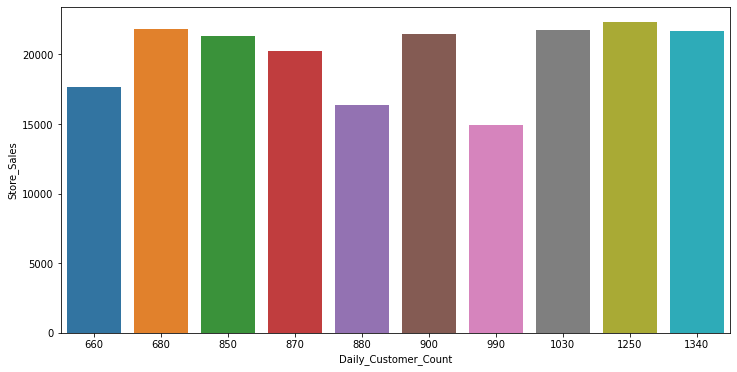

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Daily_Customer_Count", y="Store_Sales",data=sales_head)